In [1]:
import os
import networkx as nx
import pydotplus
import matplotlib.pyplot as plt
import itertools
from yosys_networkx import *

In [2]:
G = verilog2networkx('counter.v', pngfile='counter.png')

![counter](counter.png)

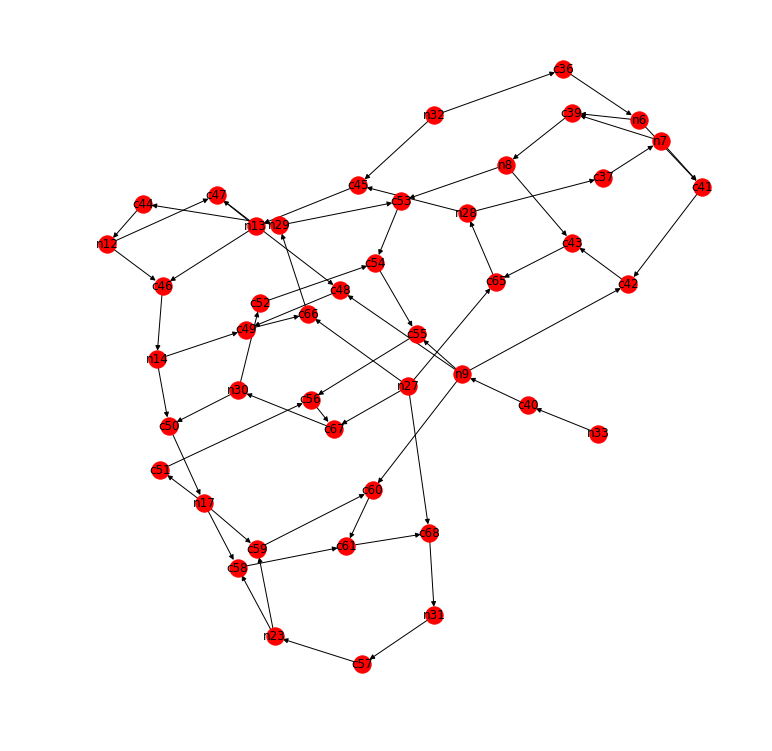

In [3]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [4]:
internal_nets(G)

['n12', 'n13', 'n14', 'n17', 'n23', 'n6', 'n7', 'n8', 'n9']

In [5]:
G = remove_internal_nets(G)

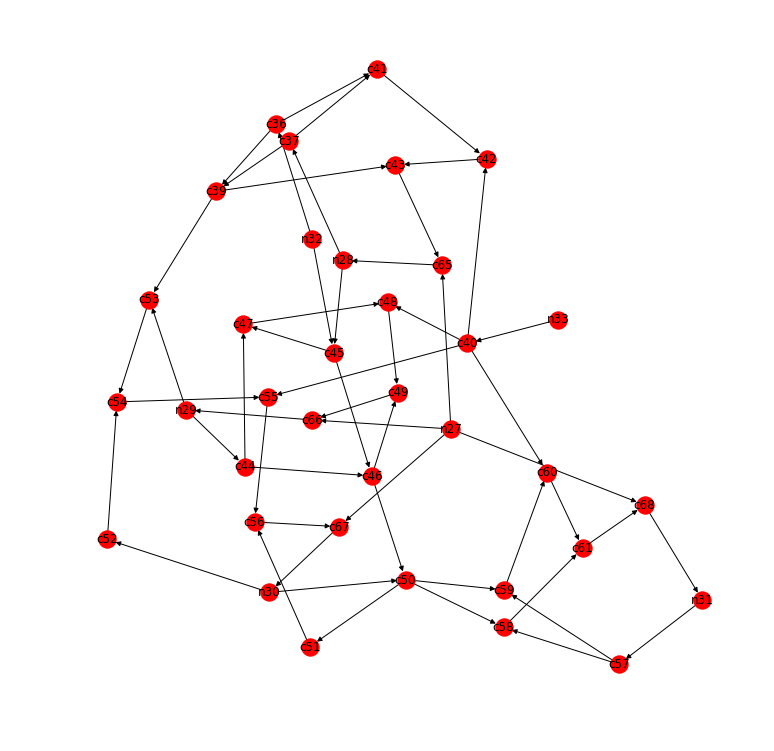

In [6]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G, with_labels=True)

In [7]:
# simple cycles in the directed graph show cyclical paths
c1 = list(nx.simple_cycles(G))
(c1, len(c1))

([['c43', 'c65', 'n28', 'c37', 'c41', 'c42'],
  ['c43', 'c65', 'n28', 'c37', 'c39'],
  ['c44', 'c47', 'c48', 'c49', 'c66', 'n29'],
  ['c44', 'c46', 'c49', 'c66', 'n29'],
  ['n30', 'c52', 'c54', 'c55', 'c56', 'c67'],
  ['n30', 'c50', 'c51', 'c56', 'c67'],
  ['c61', 'c68', 'n31', 'c57', 'c59', 'c60'],
  ['c61', 'c68', 'n31', 'c57', 'c58']],
 8)

In [8]:
G2 = nx.Graph(G.to_undirected())

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


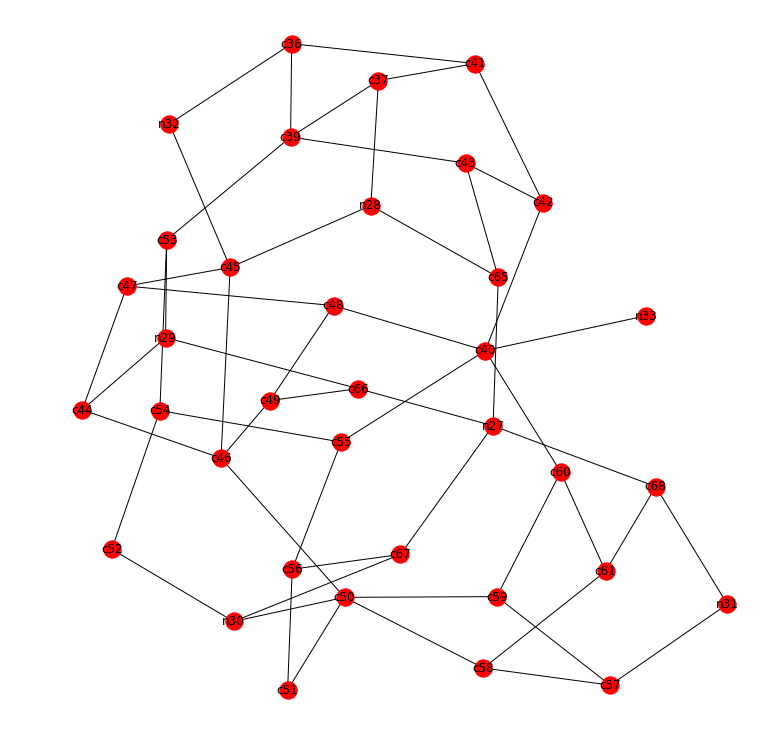

In [9]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G2, with_labels=True)

In [10]:
# cycle basis in undirected graph shows both cyclical and reconvergent paths
c2 = nx.cycle_basis(G2)
(c2, len(c2))

([['c58', 'c57', 'n31', 'c68', 'c61'],
  ['c59', 'c57', 'n31', 'c68', 'c61', 'c60'],
  ['c55', 'c56', 'c67', 'n27', 'c68', 'c61', 'c60', 'c40'],
  ['n30', 'c50', 'c51', 'c56', 'c67'],
  ['c58', 'c50', 'c51', 'c56', 'c67', 'n27', 'c68', 'c61'],
  ['c59', 'c50', 'c51', 'c56', 'c67', 'n27', 'c68', 'c61', 'c60'],
  ['c48',
   'c49',
   'c46',
   'c50',
   'c51',
   'c56',
   'c67',
   'n27',
   'c68',
   'c61',
   'c60',
   'c40'],
  ['c66', 'c49', 'c46', 'c50', 'c51', 'c56', 'c67', 'n27'],
  ['c44', 'c47', 'c45', 'c46'],
  ['c48',
   'c47',
   'c45',
   'c46',
   'c50',
   'c51',
   'c56',
   'c67',
   'n27',
   'c68',
   'c61',
   'c60',
   'c40'],
  ['c42',
   'c41',
   'c36',
   'n32',
   'c45',
   'c46',
   'c50',
   'c51',
   'c56',
   'c67',
   'n27',
   'c68',
   'c61',
   'c60',
   'c40'],
  ['n28', 'c37', 'c41', 'c36', 'n32', 'c45'],
  ['c39', 'c37', 'c41', 'c36'],
  ['c55',
   'c54',
   'c53',
   'c39',
   'c36',
   'n32',
   'c45',
   'c46',
   'c50',
   'c51',
   'c56'],
  ['n

In [11]:
G2.number_of_nodes(), G2.number_of_edges()

(36, 55)

In [12]:
# edge list for exporting to SAT solver
list(G2.edges())

[('n27', 'c65'),
 ('n27', 'c66'),
 ('n27', 'c67'),
 ('n27', 'c68'),
 ('n28', 'c37'),
 ('n28', 'c45'),
 ('n28', 'c65'),
 ('n29', 'c44'),
 ('n29', 'c53'),
 ('n29', 'c66'),
 ('n30', 'c50'),
 ('n30', 'c52'),
 ('n30', 'c67'),
 ('n31', 'c57'),
 ('n31', 'c68'),
 ('n32', 'c36'),
 ('n32', 'c45'),
 ('n33', 'c40'),
 ('c36', 'c39'),
 ('c36', 'c41'),
 ('c37', 'c39'),
 ('c37', 'c41'),
 ('c39', 'c43'),
 ('c39', 'c53'),
 ('c40', 'c42'),
 ('c40', 'c48'),
 ('c40', 'c55'),
 ('c40', 'c60'),
 ('c41', 'c42'),
 ('c42', 'c43'),
 ('c43', 'c65'),
 ('c44', 'c46'),
 ('c44', 'c47'),
 ('c45', 'c46'),
 ('c45', 'c47'),
 ('c46', 'c49'),
 ('c46', 'c50'),
 ('c47', 'c48'),
 ('c48', 'c49'),
 ('c49', 'c66'),
 ('c50', 'c51'),
 ('c50', 'c58'),
 ('c50', 'c59'),
 ('c51', 'c56'),
 ('c52', 'c54'),
 ('c53', 'c54'),
 ('c54', 'c55'),
 ('c55', 'c56'),
 ('c56', 'c67'),
 ('c57', 'c58'),
 ('c57', 'c59'),
 ('c58', 'c61'),
 ('c59', 'c60'),
 ('c60', 'c61'),
 ('c61', 'c68')]

In [43]:
import random
for node in G2.nodes:
    G2.nodes[node]['color'] = random.randrange(10)

In [50]:
for u,v,d in G2.edges(data=True):
    d['weight'] = abs(G2.nodes[v]['color'] - G2.nodes[u]['color'])
    print(u,v,d['weight'])

n27 c65 5
n27 c66 5
n27 c67 5
n27 c68 7
n28 c37 7
n28 c45 3
n28 c65 4
n29 c44 0
n29 c53 3
n29 c66 2
n30 c50 0
n30 c52 5
n30 c67 6
n31 c57 6
n31 c68 8
n32 c36 4
n32 c45 1
n33 c40 6
c36 c39 3
c36 c41 1
c37 c39 4
c37 c41 6
c39 c43 1
c39 c53 0
c40 c42 4
c40 c48 4
c40 c55 4
c40 c60 1
c41 c42 2
c42 c43 1
c43 c65 2
c44 c46 0
c44 c47 1
c45 c46 3
c45 c47 4
c46 c49 5
c46 c50 8
c47 c48 4
c48 c49 2
c49 c66 3
c50 c51 9
c50 c58 4
c50 c59 2
c51 c56 0
c52 c54 1
c53 c54 1
c54 c55 1
c55 c56 4
c56 c67 3
c57 c58 2
c57 c59 4
c58 c61 4
c59 c60 0
c60 c61 6
c61 c68 0


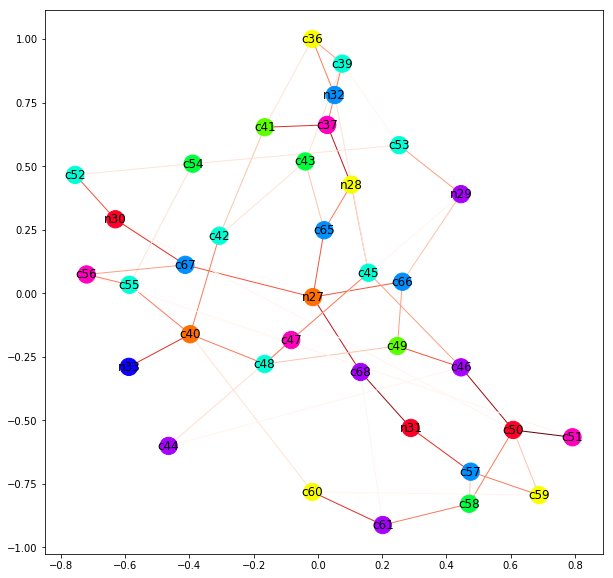

In [74]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G2, with_labels=True, 
                 edge_color=[d['weight'] for _,_,d in G2.edges(data=True)], cmap=plt.cm.gist_rainbow,
                 node_color=[G2.nodes[n]['color'] for n in G2.nodes], edge_cmap=plt.cm.Reds)

In [60]:
G2.nodes()

NodeView(('n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'c36', 'c37', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c65', 'c66', 'c67', 'c68'))

In [64]:
plt.cm.rainbow